# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [2]:
colnames = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name']
mpg_df = pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",names= colnames)  

In [3]:
mpg_df.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl"""


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
mpg_df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt          float64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [5]:
mpg_df.shape

(398, 9)

In [6]:
mpg_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

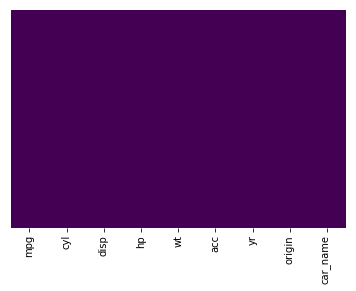

In [7]:
sns.heatmap(mpg_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null float64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
mpg_df = mpg_df.replace('?', np.nan) # when i am seeing the data it contains '?'

In [10]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [11]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null float64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


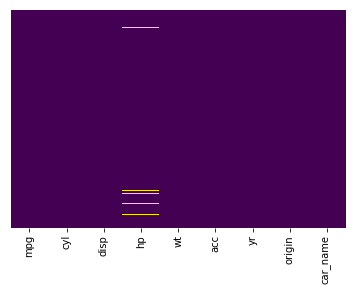

In [12]:
sns.heatmap(mpg_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
mpg_df = mpg_df.replace(np.NaN,mpg_df.iloc[:,3].median())

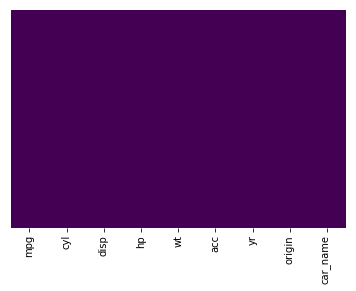

In [14]:
sns.heatmap(mpg_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
mpg_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [16]:
mpg_df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


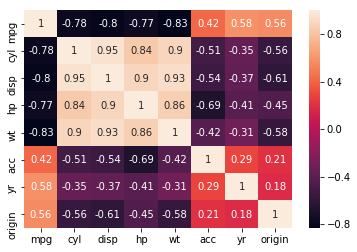

In [17]:
sns.heatmap(mpg_df.corr(), annot = True)

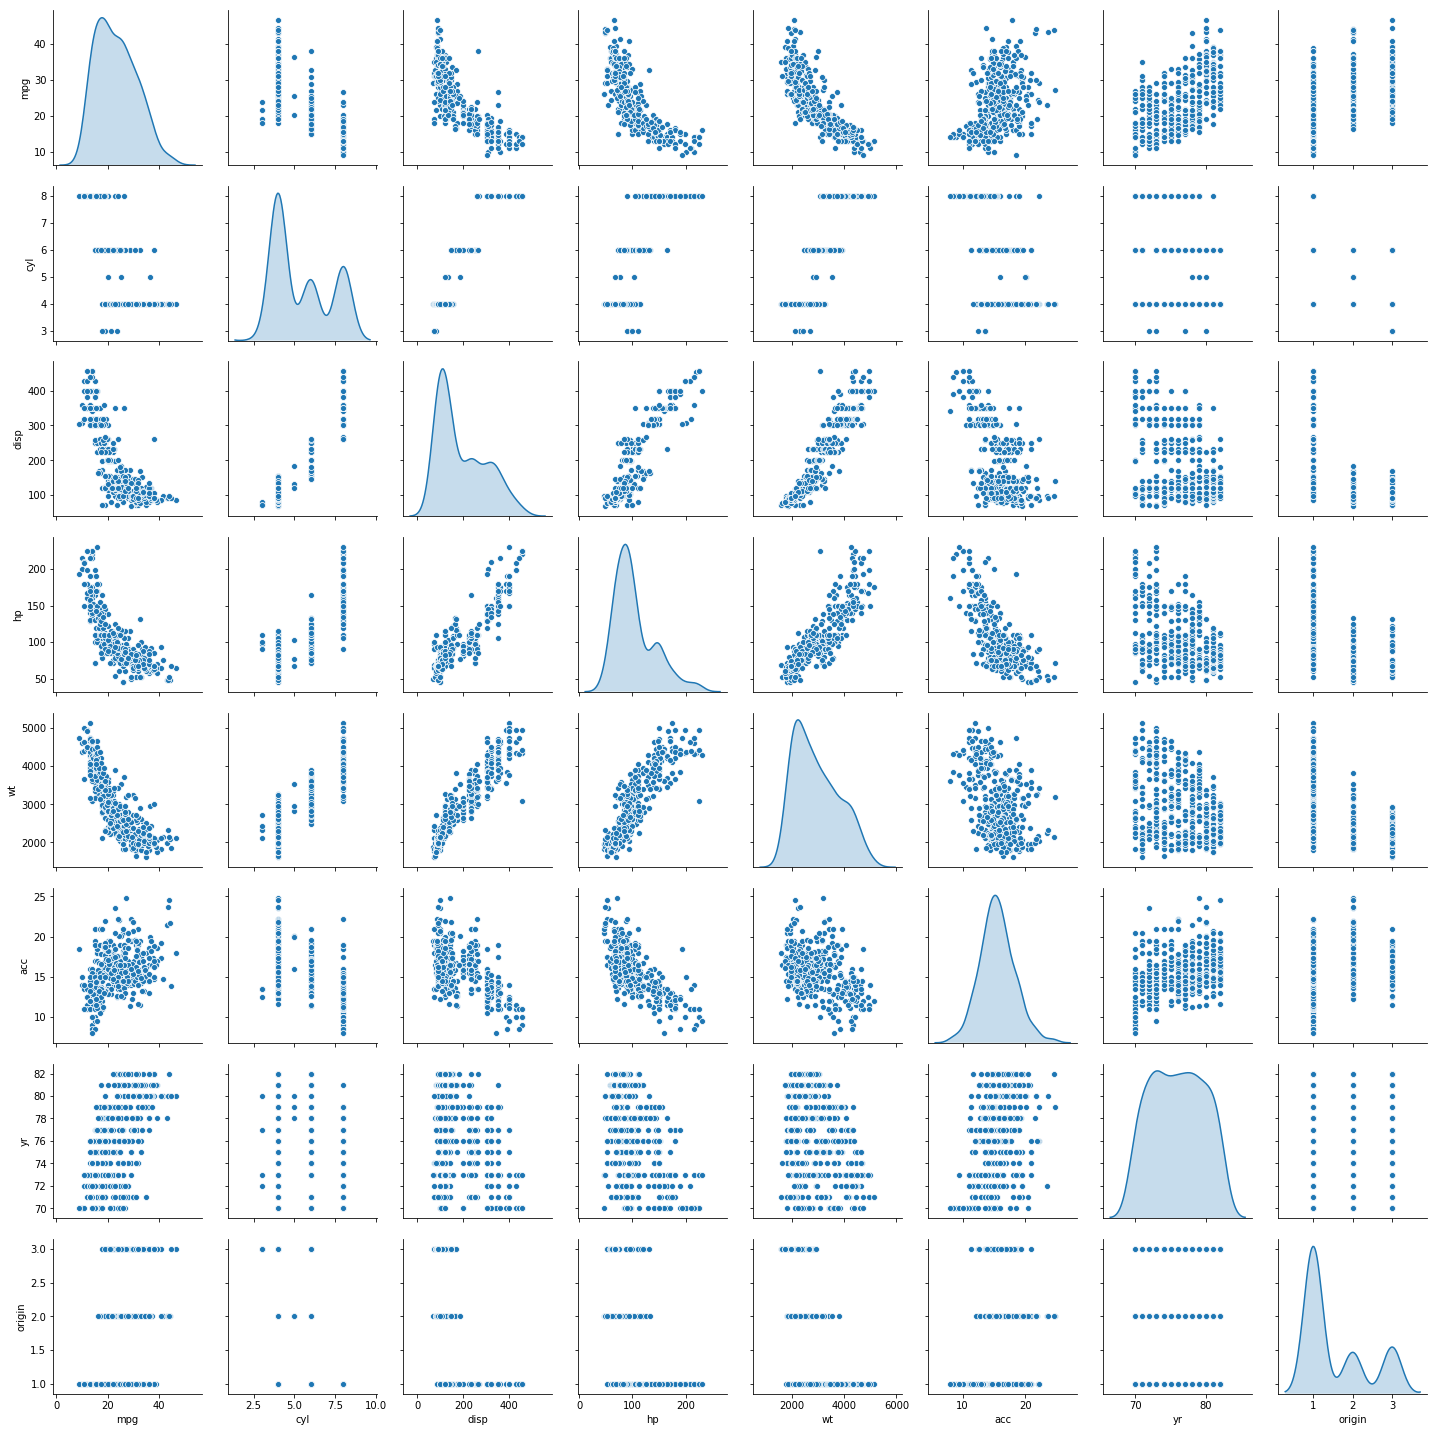

In [18]:
mpg_df_attr = mpg_df.iloc[:, 0:8]
sns.pairplot(mpg_df_attr, diag_kind='kde')   # to plot density curve instead of histogram


In [19]:
# These four columns are highly corelated -'cyl', 'hp', 'wt', 'disp'

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [20]:
mpg_df=mpg_df.drop('origin', axis=1)

mpg_df=mpg_df.drop('yr', axis=1)

mpg_df=mpg_df.drop('car_name', axis=1)

In [21]:
mpg_df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc'], dtype='object')

# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [22]:
new_mpg_df=mpg_df

In [23]:
new_mpg_df

,mpg,cyl,disp,hp,wt,acc
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5
5,15.0,8,429.0,198.0,4341.0,10.0
6,14.0,8,454.0,220.0,4354.0,9.0
7,14.0,8,440.0,215.0,4312.0,8.5
8,14.0,8,455.0,225.0,4425.0,10.0
9,15.0,8,390.0,190.0,3850.0,8.5


In [24]:
from scipy.stats import zscore

new_mpg_df_z = new_mpg_df.apply(zscore)

# Q7. Create appropriate clusters with the new data set

In [25]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(new_mpg_df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]




,num_clusters,cluster_errors
0,1,2388.000000
1,2,944.289955
2,3,609.265388
3,4,492.519413
4,5,423.323816
5,6,389.505899
6,7,334.118994
7,8,301.856476
8,9,284.940860


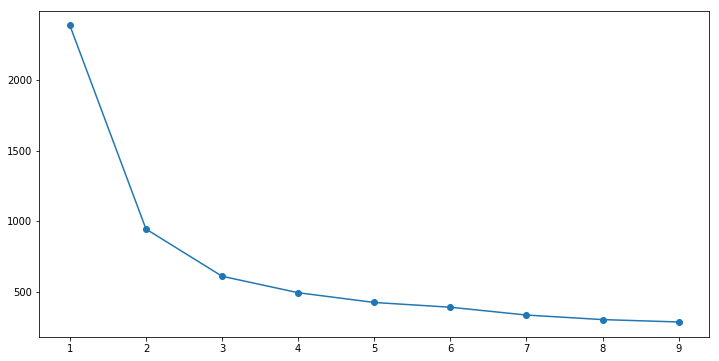

In [26]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Q8. Identify the appropriate clusters with result from above question

In [27]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(new_mpg_df_z)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

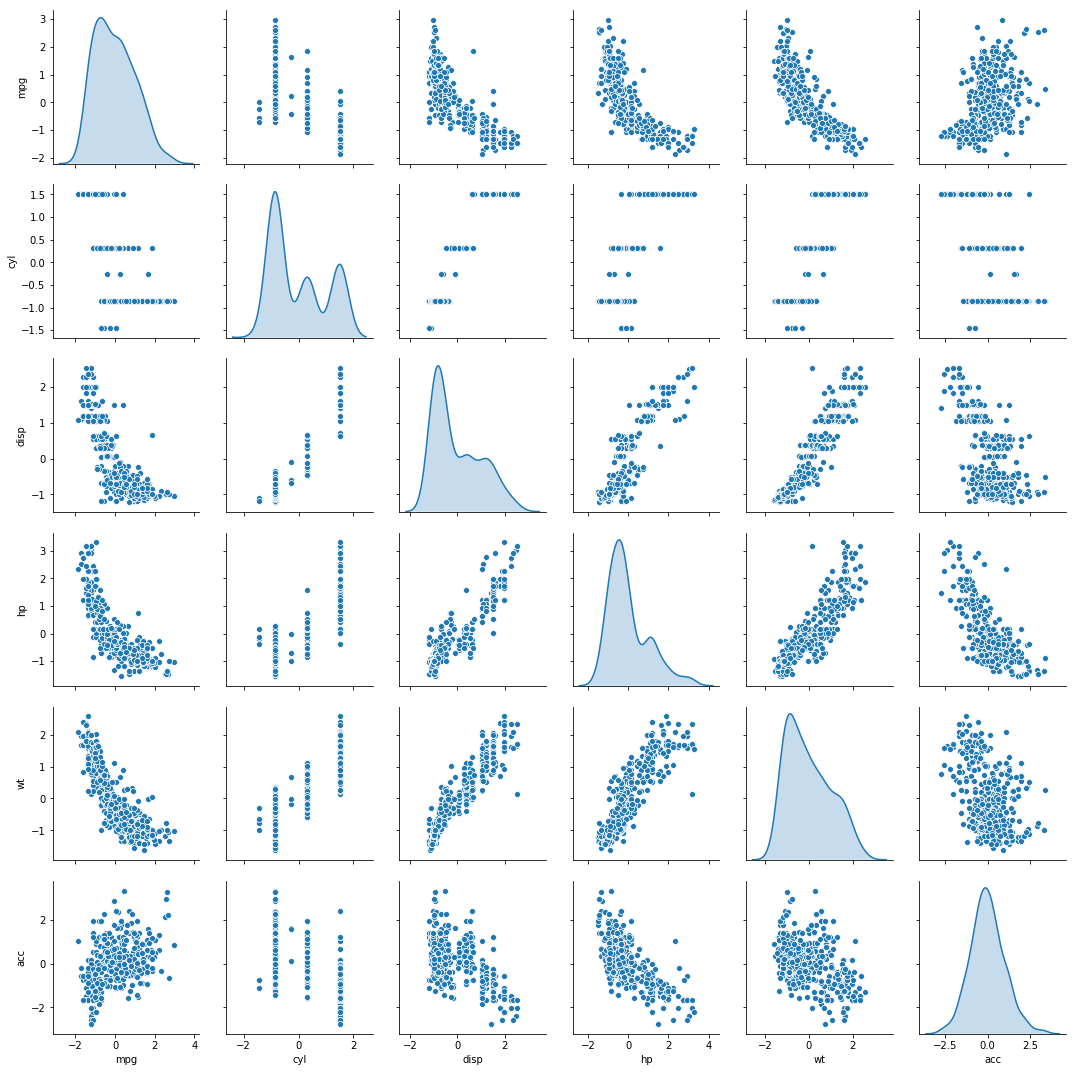

In [28]:
sns.pairplot(new_mpg_df_z, diag_kind='kde')  

# Q9. Check for no of values in each cluster and centers for each variables. 

In [29]:
centroids = cluster.cluster_centers_
centroids

array([[-1.15110476,  1.4860546 ,  1.48450715,  1.50624078,  1.38753374,
        -1.06267868],
       [ 0.75394661, -0.85347696, -0.80321374, -0.67506194, -0.78549879,
         0.36133415],
       [-0.47244453,  0.34598334,  0.23689416, -0.06773972,  0.29795187,
         0.30089004]])

In [30]:
centroid_df = pd.DataFrame(centroids, columns = list(new_mpg_df_z) )
centroid_df

,mpg,cyl,disp,hp,wt,acc
0,-1.151105,1.486055,1.484507,1.506241,1.387534,-1.062679
1,0.753947,-0.853477,-0.803214,-0.675062,-0.785499,0.361334
2,-0.472445,0.345983,0.236894,-0.067740,0.297952,0.300890


# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [31]:
prediction=cluster.predict(new_mpg_df_z)
new_mpg_df_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

In [32]:
new_mpg_df_z.groupby("GROUP").count()

,mpg,cyl,disp,hp,wt,acc
GROUP,,,,,,
0,97,97,97,97,97,97
1,207,207,207,207,207,207
2,94,94,94,94,94,94


In [34]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
new_mpg_df_z.to_excel(writer,'Sheet1')
writer.save()